# MACHINE LEARNING PROJECT


# COVID 19 DEATH RISK PREDICTION 

## HEMANT CHAUHAN


  

## Import necessary modules required

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('covid.csv', header=0)
print(data.shape)

(566602, 23)


In [4]:
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


### The above data contains various columns related to the patient's personal information and his/her precondition during covid.


# Data Analysis and Data Prepartion

In [5]:
# Gives the name of all the columns present in the dataset
data.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [6]:
# Gives the data types of all the columns or features present in the dataset
data.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

### Some columns are not important to us so we can remove those attributes 

In [7]:
# As we are focusing on the death risk so some of the columns are of no use to us 
# Thus we need to drop those columns from our dataframe
data.drop(columns = ['id','entry_date','date_symptoms','contact_other_covid','covid_res','patient_type'],inplace = True)

In [8]:
data.shape

(566602, 17)

### Check if we have any null values in the dataset

In [9]:
data.isnull().sum()

sex               0
date_died         0
intubed           0
pneumonia         0
age               0
pregnancy         0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
icu               0
dtype: int64

In [10]:
 data['sex'].unique()

array([2, 1], dtype=int64)

In [11]:
data = data.loc[0:400000,:]

### Our main aim is to predeict the risk of death of any patient thus the most important attribute for us is the result whether the patient died or recovered from the virus

### The date_died is the column we are going to use find whether the patient recovered from the virus. If the value of the column --> 9999-99-99  it depicts that the patient has survived else the patient has died at the given date

In [12]:
data['Death'] = data['date_died'].apply(lambda x: 0 if x=="9999-99-99" else 1)

In [13]:
data.dtypes

sex                int64
date_died         object
intubed            int64
pneumonia          int64
age                int64
pregnancy          int64
diabetes           int64
copd               int64
asthma             int64
inmsupr            int64
hypertension       int64
other_disease      int64
cardiovascular     int64
obesity            int64
renal_chronic      int64
tobacco            int64
icu                int64
Death              int64
dtype: object

In [14]:
data.drop(columns = ['date_died'],inplace = True)

In [15]:
data.shape

(400001, 17)

Text(0.5, 0, 'Female-1 Male-2')

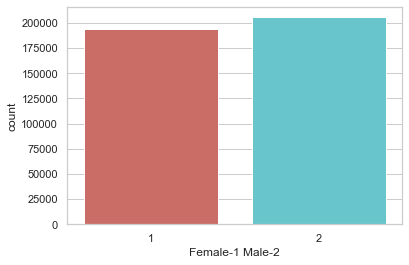

In [16]:
sns.countplot(x='sex',data=data, palette='hls')
plt.xlabel('Female-1 Male-2')

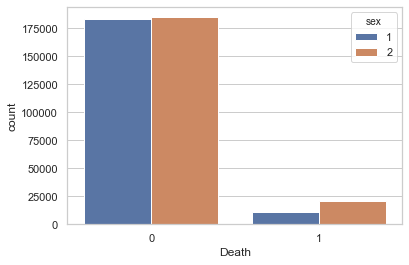

In [17]:
sns.countplot(x='Death',data=data,hue='sex')

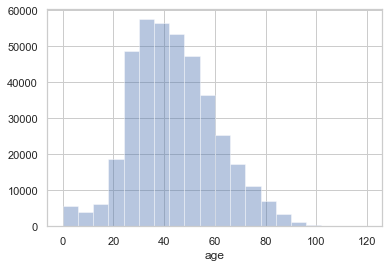

In [18]:
sns.distplot(data['age'],kde=False,bins=20)

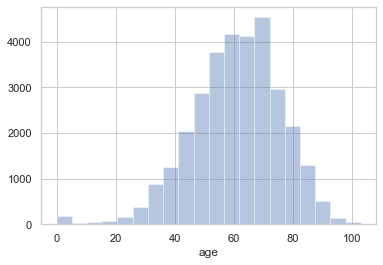

In [19]:
sns.distplot(data[data['Death']==1]['age'],kde=False,bins=20)

In [20]:
data[data['Death']==1].count()

sex               31633
intubed           31633
pneumonia         31633
age               31633
pregnancy         31633
diabetes          31633
copd              31633
asthma            31633
inmsupr           31633
hypertension      31633
other_disease     31633
cardiovascular    31633
obesity           31633
renal_chronic     31633
tobacco           31633
icu               31633
Death             31633
dtype: int64

## Replacing some values

In [21]:
data['intubed'] = data['intubed'].apply(lambda x: 0 if x not in[1,2] else x)

In [22]:
data['pregnancy'] = data['pregnancy'].apply(lambda x: 0 if x not in[1,2] else x)

In [23]:
data['icu'] = data['icu'].apply(lambda x: 0 if x not in [1,2] else x)

In [24]:
data['asthma'] = data['icu'].apply(lambda x: 0 if x not in[1,2] else x)

## Correlation between all the columns

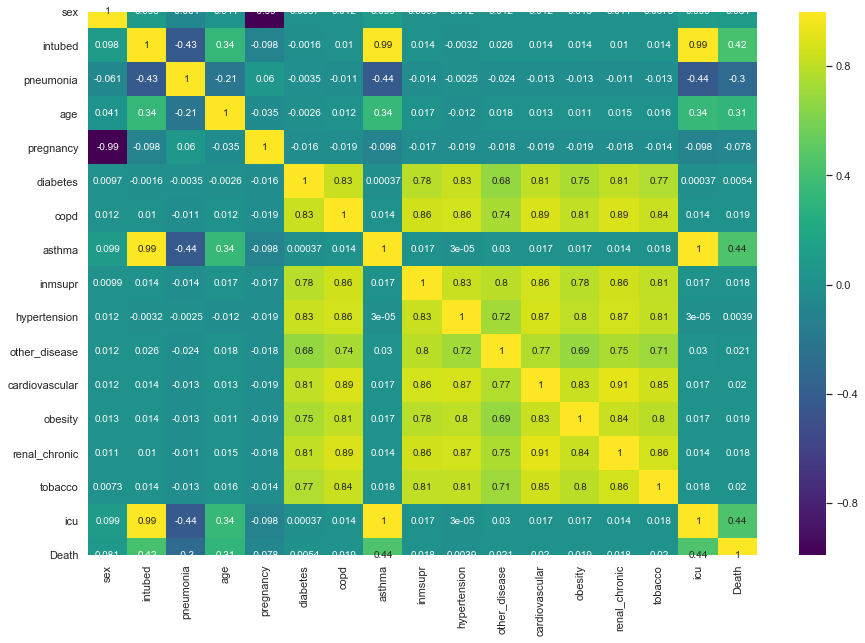

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [26]:
data.drop(columns = ['intubed'],inplace = True)

In [27]:
li = []
for col in data.columns:
    if(col!="Death"):
        li.append(col)
cols= li

# 1.Linear Regression model

In [47]:
X=data[cols].values
y=data['Death'].values

In [48]:
# splitting the data in order to test our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred = regressor.predict(X_test)

In [52]:
y_pred.round()

array([-0.,  0.,  0., ..., -0., -0.,  0.])

In [55]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_acc = accuracy_score(y_test,y_pred.round())

In [34]:
#Error Metrics
print('Mean Absolute Error:', lr_mae)  
print('Mean Squared Error:', lr_mse)
print('Root Mean Squared Error:', np.sqrt(lr_mse))
print('Accuracy',lr_acc*100)

Mean Absolute Error: 0.12853866581109705
Mean Squared Error: 0.05542153919788796
Root Mean Squared Error: 0.23541779711374405
Accuracy 92.00759990500119


# 2.Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor


In [58]:
tree_model = DecisionTreeRegressor()


In [59]:
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
y_pred1 = tree_model.predict(X_test)


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [62]:
from math import sqrt

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
tree_mse = mean_squared_error(y_test, y_pred1)
tree_mae = mean_absolute_error(y_test, y_pred1)
tree_acc = accuracy_score(y_test,y_pred1.round())

In [66]:
print("Decision Tree:")
print("Mean Absolute Error:",tree_mae)
print("Mean Squared Error:",tree_mse)
print("Root Mean Squared Error:", sqrt(tree_mse))
print("Accuracy percentage",tree_acc*100)

Decision Tree:
Mean Absolute Error: 0.10163161197770382
Mean Squared Error: 0.0630504125146519
Root Mean Squared Error: 0.2510984120114102
Accuracy percentage 91.71760352995587


# 3.Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf_model = RandomForestRegressor()

In [69]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
y_pred2 = rf_model.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [72]:
rf_mse = mean_squared_error(y_test, y_pred2)
rf_mae = mean_absolute_error(y_test, y_pred2)
rf_acc = accuracy_score(y_test,y_pred2.round())

In [73]:
print("\nRandom Forest:")
print("Mean Absolute Error:",rf_mae)
print("Mean Squared Error",rf_mse)
print("Root Mean Squared Error:", sqrt(rf_mse))
print("Accuracy percentage",rf_acc*100)


Random Forest:
Mean Absolute Error: 0.10221220125521091
Mean Squared Error 0.057431958730729454
Root Mean Squared Error: 0.23964965831548657
Accuracy percentage 91.6588542643217


# 4.KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
model = KNeighborsRegressor()

In [76]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [78]:
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [80]:
knn_mse = mean_squared_error(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)
knn_acc = accuracy_score(y_test,y_pred.round())

In [81]:
print("Mean Absolute Error:",knn_mae)
print("Mean Squared Error:",knn_mse)
print("Root Mean Squared Error:", sqrt(knn_mse))
print("Accuracy percentage",knn_acc*100)

Mean Absolute Error: 0.10274371570355371
Mean Squared Error: 0.06129223384707692
Root Mean Squared Error: 0.2475726839679146
Accuracy percentage 91.21635979550256


# 5.Neural Network 

In [83]:
from sklearn.neural_network import MLPRegressor

In [84]:
# Multilayer Perceptron regressor
model = MLPRegressor(alpha=1,max_iter=1000,momentum=0.9)

In [85]:
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [86]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
nn_mse = mean_squared_error(y_test, y_pred)
nn_mae = mean_absolute_error(y_test, y_pred)
nn_acc = accuracy_score(y_test,y_pred.round())

In [89]:
print("Mean Absolute Error:",nn_mae)
print("Mean Squared Error:",nn_mse)
print("Root Mean Squared Error:", sqrt(nn_mse))
print("Accuracy percentage",nn_acc*100)

Mean Absolute Error: 0.11261199055941944
Mean Squared Error: 0.052753966723451805
Root Mean Squared Error: 0.22968231695855867
Accuracy percentage 92.057599280009


# 6.Naive Bayes Algorithm

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [92]:
y_pred_gnb = gnb.fit(X_train,y_train).predict(X_test)
y_pred_mnb = mnb.fit(X_train,y_train).predict(X_test)

In [93]:
gnb_mse = mean_squared_error(y_test, y_pred_gnb)
gnb_mae = mean_absolute_error(y_test, y_pred_gnb)
gnb_acc = accuracy_score(y_test,y_pred_gnb.round())

In [94]:
mnb_mse = mean_squared_error(y_test, y_pred_mnb)
mnb_mae = mean_absolute_error(y_test, y_pred_mnb)
mnb_acc = accuracy_score(y_test,y_pred_mnb.round())

In [95]:
print("Mean Absolute Error:",gnb_mae)
print("Mean Squared Error:",gnb_mse)
print("Root Mean Squared Error:", sqrt(gnb_mse))
print("Accuracy percentage",gnb_acc*100)

Mean Absolute Error: 0.09363632954588068
Mean Squared Error: 0.09363632954588068
Root Mean Squared Error: 0.3060005384731875
Accuracy percentage 90.63636704541193


In [96]:
print("Mean Absolute Error:",mnb_mae)
print("Mean Squared Error:",mnb_mse)
print("Root Mean Squared Error:", sqrt(mnb_mse))
print("Accuracy percentage",mnb_acc*100)

Mean Absolute Error: 0.14309821127235908
Mean Squared Error: 0.14309821127235908
Root Mean Squared Error: 0.37828324212467973
Accuracy percentage 85.6901788727641


# 7.LSTM network

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [98]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True,))
regressor.add(Dropout(0.5))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [99]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 15, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 15, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 15, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [100]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320000, 15), (320000,), (80001, 15), (80001,))

In [101]:

X_train_lsm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lsm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train_lsm.shape) 
print(X_test_lsm.shape)

(320000, 15, 1)
(80001, 15, 1)


In [102]:
# Fitting the LSTM to the Training set
history = regressor.fit(X_train_lsm, y_train, validation_split=0.2, epochs = 40, batch_size = 32, verbose=1, shuffle=False)

Train on 256000 samples, validate on 64000 samples
Epoch 1/40
256000/256000 [==============================] - 166s 648us/sample - loss: 0.0557 - val_loss: 0.0520
Epoch 2/40
256000/256000 [==============================] - 164s 639us/sample - loss: 0.0528 - val_loss: 0.0525
Epoch 3/40
256000/256000 [==============================] - 162s 634us/sample - loss: 0.0526 - val_loss: 0.0523
Epoch 4/40
256000/256000 [==============================] - 178s 694us/sample - loss: 0.0523 - val_loss: 0.0517
Epoch 5/40
256000/256000 [==============================] - 180s 702us/sample - loss: 0.0522 - val_loss: 0.0515
Epoch 6/40
256000/256000 [==============================] - 174s 681us/sample - loss: 0.0520 - val_loss: 0.0514ss
Epoch 7/40
256000/256000 [==============================] - 175s 684us/sample - loss: 0.0519 - val_loss: 0.0513
Epoch 8/40
256000/256000 [==============================] - 179s 701us/sample - loss: 0.0518 - val_loss: 0.0510
Epoch 9/40
256000/256000 [=========================

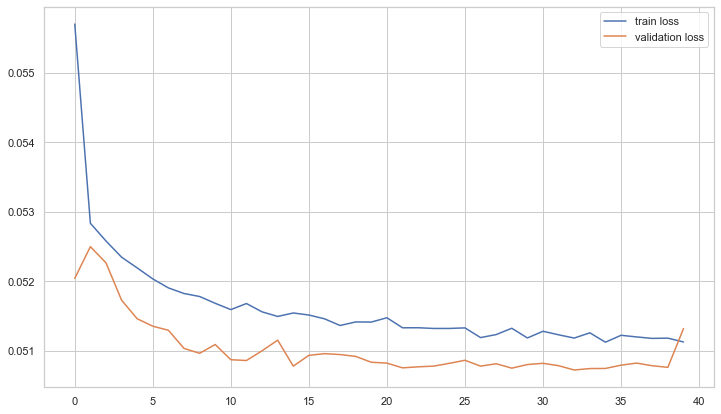

In [103]:
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [104]:
test_predict = regressor.predict(X_test_lsm)

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [106]:
lstm_mse = mean_squared_error(y_test, test_predict)
lstm_mae = mean_absolute_error(y_test, test_predict)
lstm_acc = accuracy_score(y_test,test_predict.round())

In [107]:
print("Mean Absolute Error:",lstm_mae)
print("Mean Squared Error:",lstm_mse)
print("Root Mean Squared Error:", sqrt(lstm_mse))
print("Accuracy percentage",lstm_acc*100)

Mean Absolute Error: 0.10711727245231735
Mean Squared Error: 0.05168821908773316
Root Mean Squared Error: 0.22735043234560423
Accuracy percentage 92.12884838939513


# Comparison of models implemented

### Based on accuracy score

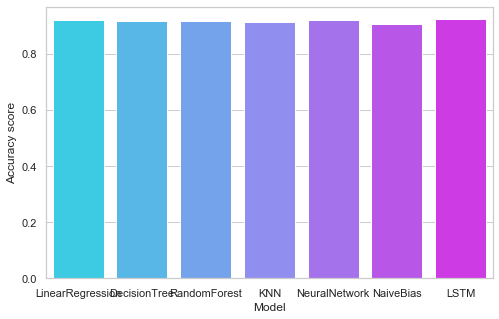

In [117]:
plt.figure(figsize = (8,5))
X = ['LinearRegression','DecisionTree','RandomForest','KNN','NeuralNetwork','NaiveBias','LSTM']
Y = [lr_acc,tree_acc,rf_acc,knn_acc,nn_acc,gnb_acc,lstm_acc]
ax = sns.barplot(x=X,y=Y,palette='cool')
ax.set(xlabel ='Model',ylabel ='Accuracy score')
plt.show()

### Based on mean absolute error

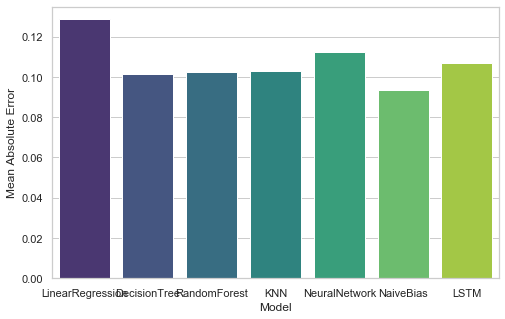

In [112]:
plt.figure(figsize = (8,5))
X = ['LinearRegression','DecisionTree','RandomForest','KNN','NeuralNetwork','NaiveBias','LSTM']
Y = [lr_mae,tree_mae,rf_mae,knn_mae,nn_mae,gnb_mae,lstm_mae]
ax = sns.barplot(x=X,y=Y,palette='viridis')
ax.set(xlabel ='Model',ylabel ='Mean Absolute Error')
plt.show()

### Based on mean square error

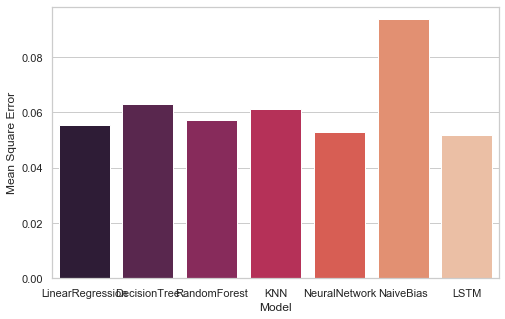

In [113]:
plt.figure(figsize = (8,5))
X = ['LinearRegression','DecisionTree','RandomForest','KNN','NeuralNetwork','NaiveBias','LSTM']
Y = [lr_mse,tree_mse,rf_mse,knn_mse,nn_mse,gnb_mse,lstm_mse]
ax = sns.barplot(x=X,y=Y,palette='rocket')
ax.set(xlabel ='Model',ylabel ='Mean Square Error')
plt.show()



# Summary and results derived :

## We have done data analysis and implemented seven machine learning algorithms in order to predict the risk a patient can have of dying.

## With the help of EDA we have cocluded following main points:
### 1.The covid virus has effected more to the higher age group.
### 2. Highest amount of deaths reported were between the age group 60-80
### 3. The people who have diseases like pneumonia or asthma are at a higher risk.
### 4. Data analysis has also shown that there are more number of cases of males than females. 

# MODELS AND PERFORMANCE:



### Linear Regression   :      92.00

### Decision Tree           :      91.71

### Random Forest        :      91.65

### KNN                           :      91.21

### Neural Network        :      92.05

### Gaussian Naive Bias       :      90.63

### Multinomial Naive Bias   :      85.69

### LSTM netowork        :      92.12


### We have succesfully developed 8 ML models in order to predict the mortality or death risk of a patient and compared them. We have achieved the highest accuracy with the LSTM network model - 92.12%. We have found out that LSTM and Neural Networks have performed better than the other models.